In [7]:
import matplotlib.pyplot as plt
import imageio.v3 as iio
import numpy as np
import math

In [15]:
def dec2bin(I, bits):
    I_bin = []
    for i in I.flatten():
        b = f'{i:b}'.rjust(bits, '0')
        I_bin.append(np.array(list(b)))
    return np.array(I_bin).astype(int)

In [4]:
def bin2dec(I):
    I_dec = []
    for i in I:
        I_dec.append(int(''.join(map(str, i)), 2))
    return np.array(I_dec)

In [11]:
def LSB_en(I, S):
    I_bin = dec2bin(I, 8).T.flatten()
    I_bin[-len(S):] = S
    return bin2dec(I_bin.reshape(8,-1).T).reshape(I.shape), len(S)

In [5]:
def LSB_de(Im, Slen):
    return dec2bin(Im, 8).T.flatten()[-Slen:]

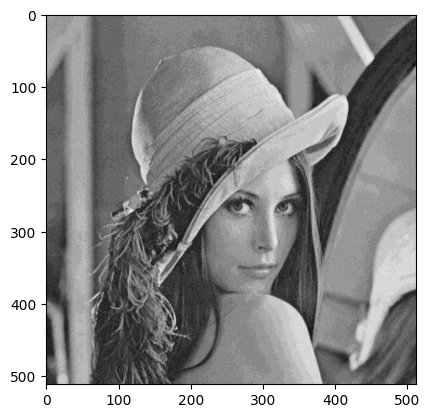

In [20]:
img = iio.imread(r'images\Lena_Gray.tiff')
s_size = 4 * img.shape[0] * img.shape[1]
secret = np.random.randint(2, size=s_size)
imgM, Slen = LSB_en(img, secret)
plt.imshow(imgM, cmap = 'gray', vmin=0, vmax=255)

In [23]:
np.array_equal(secret, LSB_de(imgM, s_size))

True

In [24]:
def get_PSNR(p1, p2):
    MSE = np.sum((p1-p2)**2)/(p1.shape[0]*p1.shape[1])
    return 10 * math.log10(255**2/MSE)

In [25]:
get_PSNR(img, imgM)

31.792105909681197